In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32  #every element is a batch of 32 elements so the len of the dataset is 68


2176

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)                          # 3 CHNNELS  i,e RGB channels.
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 2 2 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 2 2 1 1 1 1 0]


In [8]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0])   # FIRST ELEMENT  and it os a tensor 

tf.Tensor(
[[[192. 191. 199.]
  [189. 188. 196.]
  [185. 184. 192.]
  ...
  [177. 175. 186.]
  [176. 174. 185.]
  [176. 174. 185.]]

 [[193. 192. 200.]
  [188. 187. 195.]
  [184. 183. 191.]
  ...
  [181. 179. 190.]
  [179. 177. 188.]
  [179. 177. 188.]]

 [[192. 191. 199.]
  [189. 188. 196.]
  [186. 185. 193.]
  ...
  [183. 181. 192.]
  [182. 180. 191.]
  [182. 180. 191.]]

 ...

 [[168. 165. 172.]
  [172. 169. 176.]
  [168. 165. 172.]
  ...
  [153. 150. 161.]
  [151. 147. 161.]
  [141. 137. 151.]]

 [[165. 162. 169.]
  [166. 163. 170.]
  [155. 152. 159.]
  ...
  [152. 149. 160.]
  [144. 140. 154.]
  [143. 139. 153.]]

 [[166. 163. 170.]
  [174. 171. 178.]
  [165. 162. 169.]
  ...
  [158. 155. 166.]
  [149. 145. 159.]
  [154. 150. 164.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())      # because that is a tensor we have to convert to numpy
                                       # the color is represented from 0 to 255

[[[140. 129. 133.]
  [146. 135. 139.]
  [126. 115. 119.]
  ...
  [116. 104. 108.]
  [106.  94.  98.]
  [ 94.  82.  86.]]

 [[116. 105. 109.]
  [139. 128. 132.]
  [127. 116. 120.]
  ...
  [108.  96. 100.]
  [108.  96. 100.]
  [124. 112. 116.]]

 [[119. 108. 112.]
  [137. 126. 130.]
  [142. 131. 135.]
  ...
  [113. 101. 105.]
  [120. 108. 112.]
  [101.  89.  93.]]

 ...

 [[192. 187. 191.]
  [188. 183. 187.]
  [187. 182. 186.]
  ...
  [176. 168. 166.]
  [184. 176. 174.]
  [181. 173. 171.]]

 [[186. 181. 185.]
  [184. 179. 183.]
  [186. 181. 185.]
  ...
  [180. 172. 170.]
  [186. 178. 176.]
  [181. 173. 171.]]

 [[181. 176. 180.]
  [181. 176. 180.]
  [185. 180. 184.]
  ...
  [184. 176. 174.]
  [186. 178. 176.]
  [179. 171. 169.]]]


In [10]:
for image_batch , label_batch in dataset.take(1):
    
    print(image_batch[0].shape)

(256, 256, 3)


(256, 256, 3)


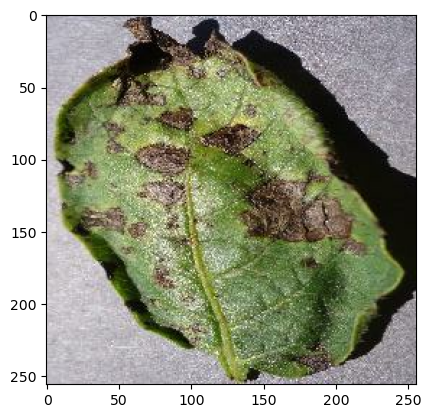

In [11]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].shape)

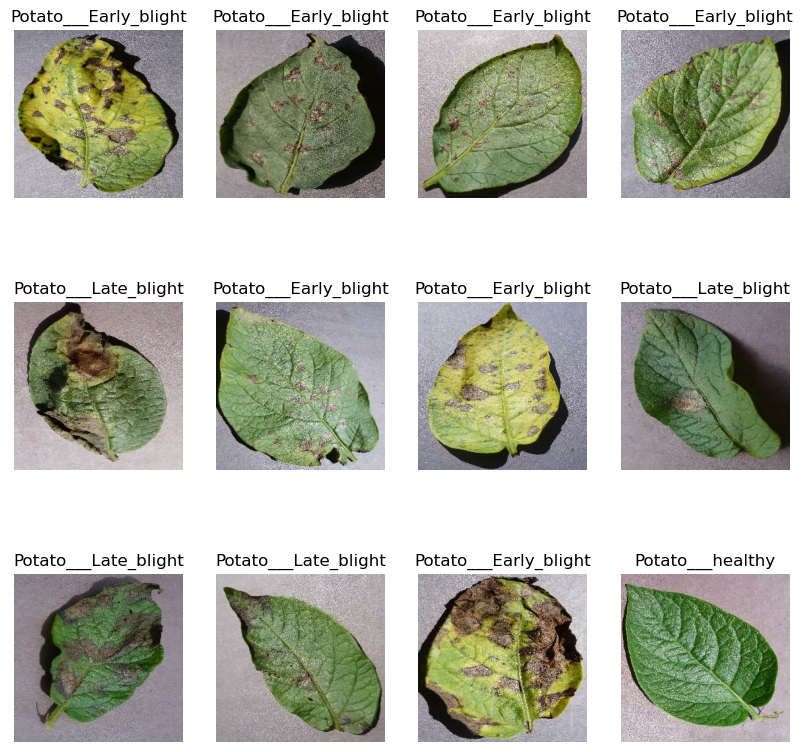

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [13]:
len(dataset)

68

In [14]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [15]:
train_ds = dataset.take(54)
len(train_ds)

54

In [16]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [17]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [18]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [19]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

54

In [23]:
len(val_ds)

6

In [24]:
len(test_ds)

8

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)


Epoch 1/5
54/54 [==============================] - 46s 799ms/step - loss: 0.9218 - accuracy: 0.4751 - val_loss: 0.8642 - val_accuracy: 0.4479
Epoch 2/5
54/54 [==============================] - 44s 803ms/step - loss: 0.7314 - accuracy: 0.6753 - val_loss: 0.5101 - val_accuracy: 0.7969
Epoch 3/5
54/54 [==============================] - 44s 821ms/step - loss: 0.4813 - accuracy: 0.8003 - val_loss: 0.3923 - val_accuracy: 0.8385
Epoch 4/5
54/54 [==============================] - 44s 820ms/step - loss: 0.3289 - accuracy: 0.8692 - val_loss: 0.3430 - val_accuracy: 0.8594
Epoch 5/5
54/54 [==============================] - 45s 835ms/step - loss: 0.2801 - accuracy: 0.8872 - val_loss: 0.1850 - val_accuracy: 0.9115


In [33]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 234ms/step - loss: 0.2189 - accuracy: 0.9062


In [34]:
scores

[0.21886509656906128, 0.90625]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
type(history.history['loss'])

list

In [39]:
len(history.history['loss'])

5

In [40]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.921823263168335,
 0.7314003109931946,
 0.48126220703125,
 0.3288775682449341,
 0.28012213110923767]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (50,) and (5,)

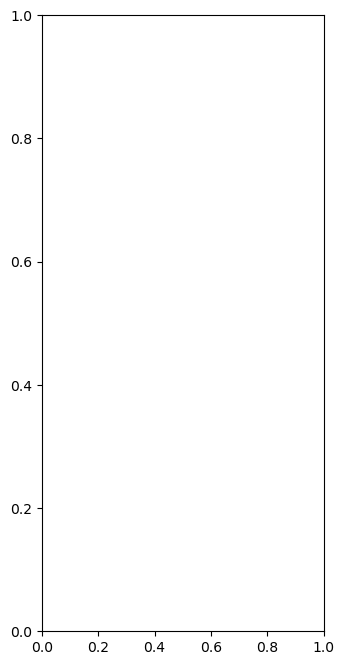

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 327ms/step
predicted label: Potato___Early_blight


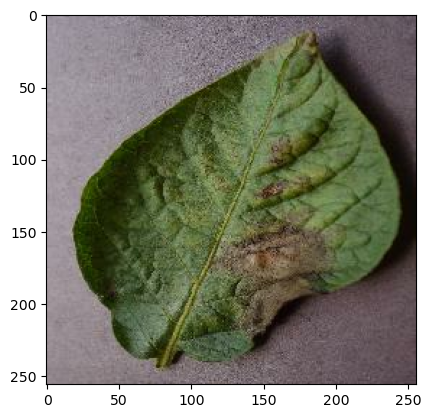

In [43]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


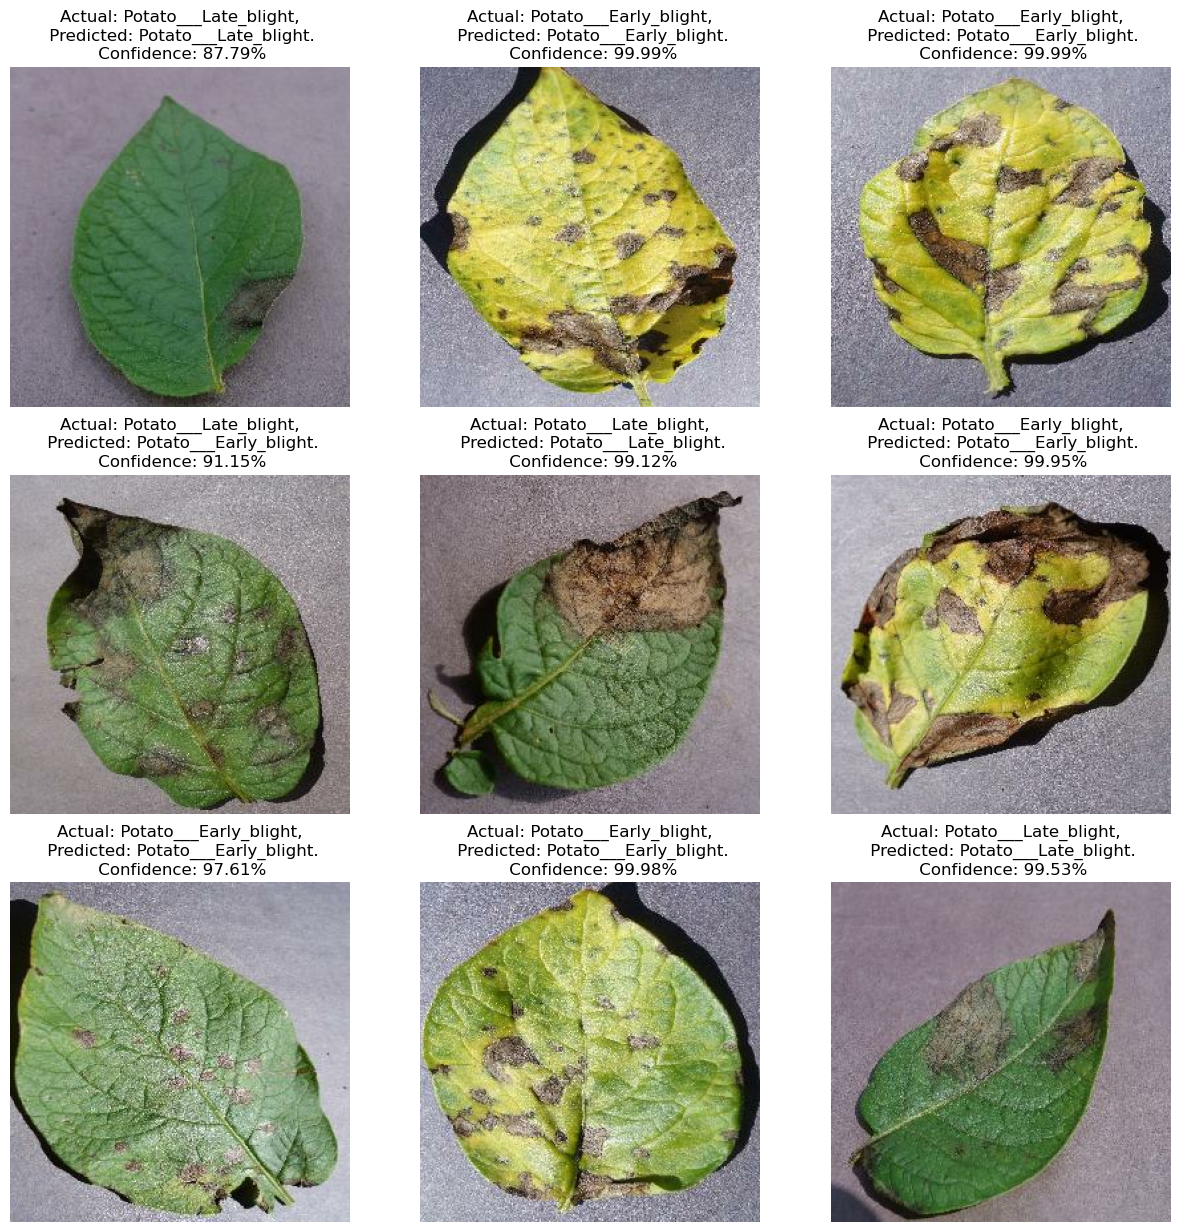

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [46]:
import os 
max([int(i) for i in os.listdir("../models") + [0]])+1

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [47]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [48]:
model.save("../potatoes.h5")